In [158]:
from gradient_descent import GradientDescent
import numpy as np
import matplotlib.pyplot as plt
from dichotomy import DichotomyScheduler

In [195]:
def generate_Q(n, k):
    A = np.random.sample((n, n))
    U, S, _ = np.linalg.svd(A)
    lambda_min = np.min(S)
    lambda_max = np.max(S)
    S = (S - lambda_min) / (lambda_max - lambda_min) * (np.sqrt(k) - 1) + 1
    S = np.diag(S)
    
    return U @ S @ S.T @ U.T

def generate_f(Q, n):
    return lambda x: np.sum(np.array([[[Q[i][j] * x[i] * x[j]] for i in range(n)] for j in range(n)]), axis=1)

def generate_grad(Q, n):
    f_grad_comp = lambda x, i: np.sum(Q[i] * x * [2 if j == i else 1 for j in range(n)]) 
    return lambda x: np.array([f_grad_comp(x, i) for i in range(n)])

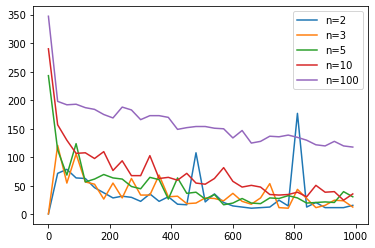

In [226]:
plot_range = range(1, 1000, 30)
for n in [2, 3, 5, 10, 100]:
    iters_value = []
    for k in plot_range:
        Q = generate_Q(n, k)
        f = generate_f(Q, n)
        f_grad = generate_grad(Q, n)
        
        gd = GradientDescent(function=f, derivative=f_grad, epsilon=0.001, iterations=500, initial_point=np.random.rand(n))
        _, iters = gd.optimize()
        iters_value.append(iters)
    plt.plot(plot_range, iters_value, label=f'n={n}')
plt.xlabel = 'k'
plt.ylabel = 'iters'
plt.legend()

